# Sklearn实现

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

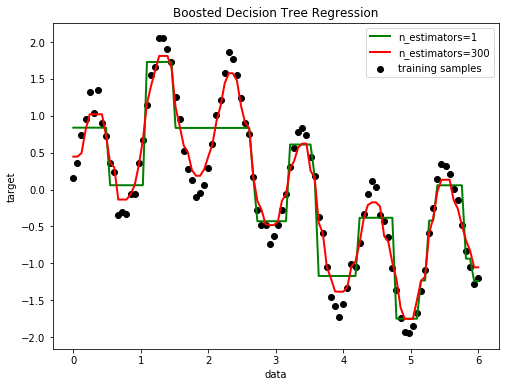

In [6]:
rng = np.random.RandomState(1)
X = np.linspace(0, 6, 100)[:, np.newaxis]
y = np.sin(X).ravel() + np.sin(6 * X).ravel() + rng.normal(0, 0.1, X.shape[0])

regr_1 = DecisionTreeRegressor(max_depth=4)
# n_estimators：是使用的弱分类器的数量，默认为50个
regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), 
                           n_estimators=300, random_state=rng)

regr_1.fit(X, y)
regr_2.fit(X, y)

y_1 = regr_1.predict(X)
y_2 = regr_2.predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(X, y, c='k', label="training samples")
plt.plot(X, y_1, c='g', label="n_estimators=1", linewidth=2)
plt.plot(X, y_2, c='r', label="n_estimators=300", linewidth=2)
plt.xlabel('data')
plt.ylabel('target')
plt.title("Boosted Decision Tree Regression")
plt.legend()
plt.show()

In [8]:
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
# 加入噪声
y[::5] += 3 * (0.5 - rng.rand(16))

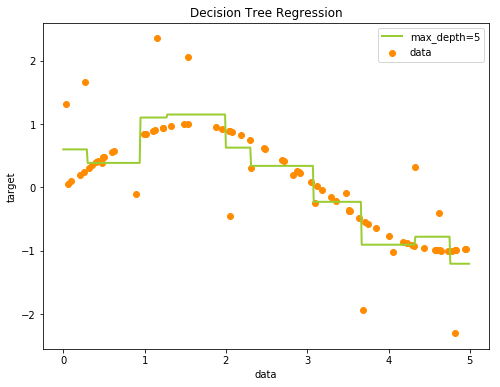

In [12]:
regr_2 = DecisionTreeRegressor(max_depth=5)
# 保持max_depth=5不变，增加min_samples_leaf=6，进一步提升效果
regr_2 = DecisionTreeRegressor(min_samples_leaf=6)
regr_2.fit(X, y)

X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_2 = regr_2.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(X, y, c='darkorange', label='data')
plt.plot(X_test, y_2, color='yellowgreen', label='max_depth=5', linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()